In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Book1.csv')

Saving Book1.csv to Book1.csv


In [18]:
X = df.iloc[:, 1].values.reshape(-1,1) # extracting  column 1 (Open) - How much the market is worth when it opens
y = df.iloc[:, 2].values.reshape(-1,1) # extracting column 2 (Highs)

In [19]:
# Spliting data into training and test sets
# Adjusting the test_size parameter to control the size of the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model (because I think it would be best) and fitting it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.9990068512372433


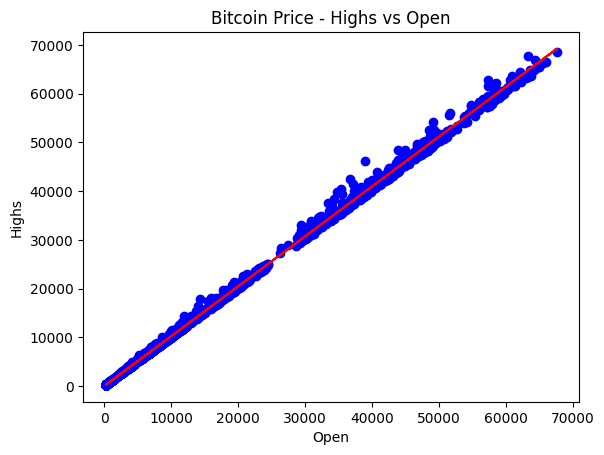

In [21]:
# Plotting the training data
plt.scatter(X_train, y_train, color='blue')
plt.title('Bitcoin Price - Highs vs Open')
plt.xlabel('Open')
plt.ylabel('Highs')

# Calling funtion of regression line
plt.plot(X_train, model.predict(X_train), color='red')

plt.show()

# Seems to be underfitting the data...

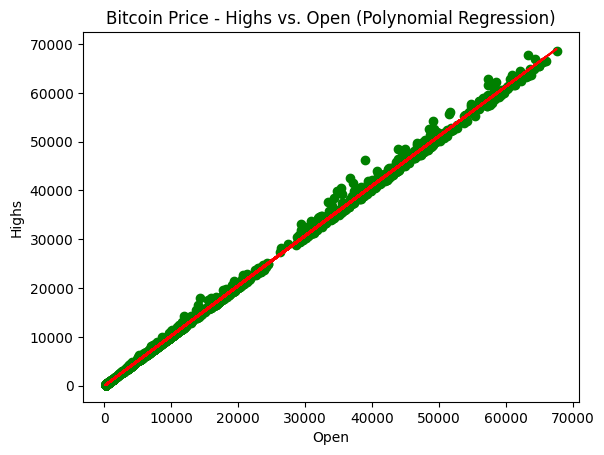

<Figure size 1000x800 with 0 Axes>

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Transforming data to include polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Trying polynomial regression
model = LinearRegression()
model.fit(X_train_poly, y_train)

plt.scatter(X_train, y_train, color='Green')
plt.plot(X_train, model.predict(poly.fit_transform(X_train)), color='red')
plt.title('Bitcoin Price - Highs vs. Open (Polynomial Regression)')
plt.xlabel('Open')
plt.ylabel('Highs')
plt.figure(figsize=(10, 8))
plt.show()

# It's SUPER ugly but it works...


<h1>Fantastic...</h1>

<p>I splitting the graphs into different styles, one in scatterplot and the on the in slope form.</p>

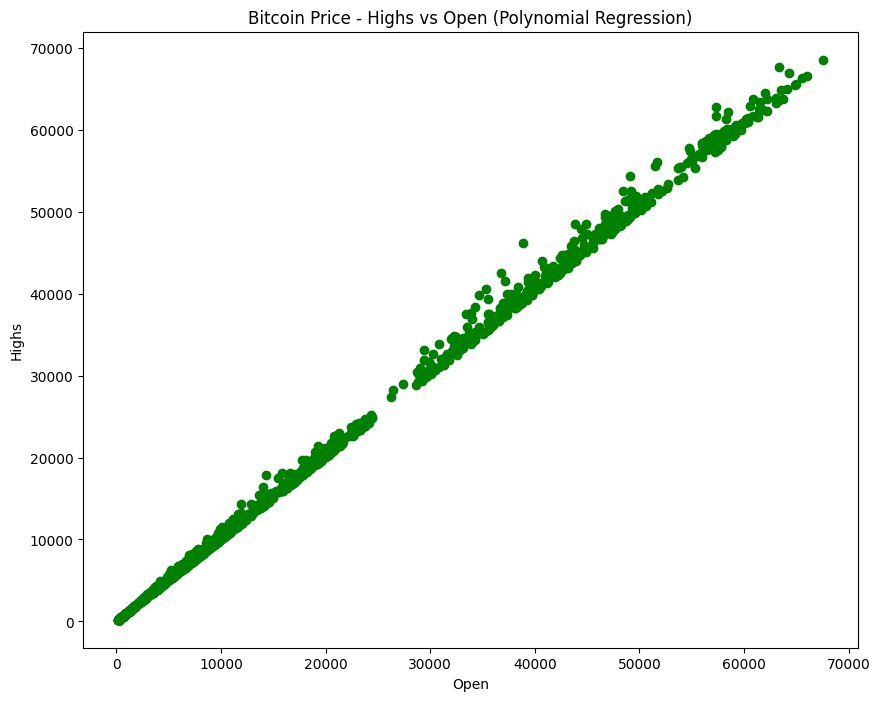

In [28]:
plt.figure(figsize=(10, 8))

plt.scatter(X_train, y_train, color='green')


plt.title('Bitcoin Price - Highs vs Open (Polynomial Regression)')
plt.xlabel('Open')
plt.ylabel('Highs')

plt.show()


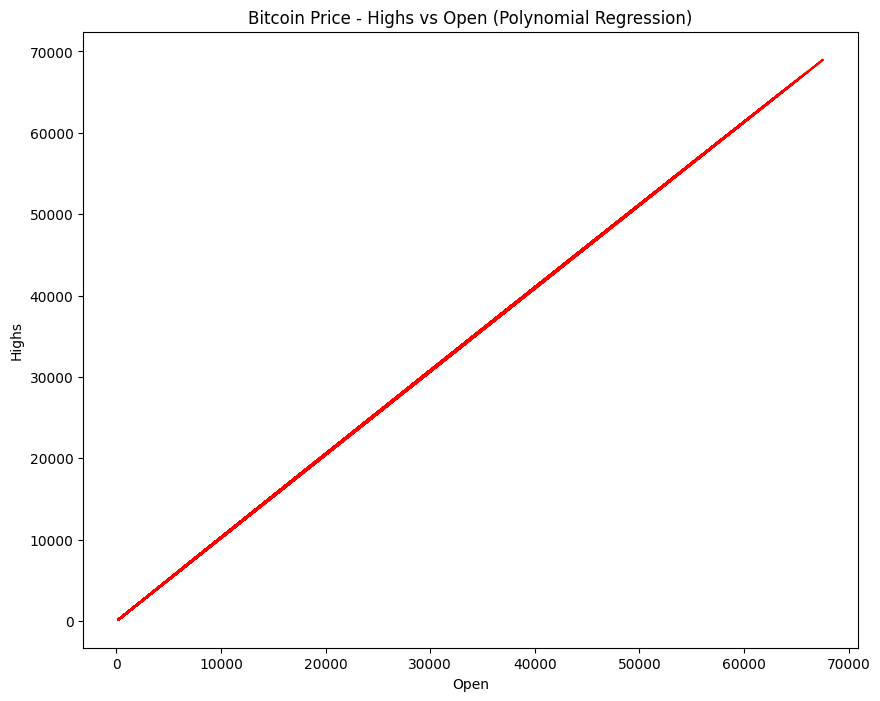

In [30]:
plt.figure(figsize=(10, 8))

plt.plot(X_train, model.predict(poly.fit_transform(X_train)), color='red')


plt.title('Bitcoin Price - Highs vs Open (Polynomial Regression)')
plt.xlabel('Open')
plt.ylabel('Highs')

plt.show()